In [1]:
# -*- coding: 
    

# Project: Linear Regression

import pandas as pd
import numpy as np 
import math
import pylab
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
import scipy.stats as spstats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as MSE



In [2]:

house = pd.read_csv('HousePrices.csv')

# check the dimension 
house.shape

# check columns name
house.columns

# Check Datatypes
d_types = house.dtypes

# summarised the data set 
desc = house.describe()

# NULL Check
d_null = house.isnull().sum()

# check 0 
d_zeros = house[house==0].count()


In [3]:

# split the dataset into numeric to factor columns
numColumn = house.select_dtypes(include=['int32','int64','float32','float64']).columns.values
factorColumn = house.select_dtypes(include=['object']).columns.values

# LotFrontage set null value to 0
house.LotFrontage[house.LotFrontage.isnull()] = 0

# setting the garage related columns from null
# since there is no garage for the given rows
cols = ['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']
for i in cols:
    house[i][house[i].isnull()] = "No"
         
# Alley Columns NA converts to No value
house.Alley[house.Alley.isnull()] = "No"

# MasVnrType object columns none converts to No value
house.MasVnrType[house.MasVnrType.isnull()] = "No"

# MasVnrArea  columns " " converts to 0 value
house.MasVnrArea[house.MasVnrArea.isnull()] = 0

# Basement
basement_cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
for i in basement_cols:
    house[i][house[i].isnull()] = "No"
    
# FireplaceQu
house.FireplaceQu[house.FireplaceQu.isnull()] = "No"

# Electrical
house.Electrical[house.Electrical.isnull()] = "Mix"

# PoolQC
house.PoolQC[house.PoolQC.isnull()] = "No"

# Fence
house.Fence[house.Fence.isnull()] = "No"

# MiscFeature
house.MiscFeature[house.MiscFeature.isnull()] = "No"

# Drop ID column
house = house.drop('Id', axis=1)

# Rename 3 columns
house = house.rename(columns = {'1stFlrSF' : 'FirststFlrSF', '2ndFlrSF' : 'SecondndFlrSF', '3SsnPorch' : 'ThirdSsnPorch'}, inplace = False)

# 9 numeric columns remove
# BsmtFinSF2 available singulariti 0.8822
house.BsmtFinSF2.value_counts()
house = house.drop('BsmtFinSF2', axis=1)

# LowQualFinSF available singulariti 0.9811
house.LowQualFinSF.value_counts()
house = house.drop('LowQualFinSF', axis=1)

# BsmtHalfBath available singulariti 0.9450
house.BsmtHalfBath.value_counts()
house = house.drop('BsmtHalfBath', axis=1)

# KitchenAbvGr available singulariti 0.9479
house.KitchenAbvGr.value_counts()
house = house.drop('KitchenAbvGr', axis=1)

# EnclosedPorch available singulariti 0.8634
house.EnclosedPorch.value_counts()
house = house.drop('EnclosedPorch', axis=1)

# ScreenPorch available singulariti 0.9223
house.ScreenPorch.value_counts()
house = house.drop('ScreenPorch', axis=1)

# PoolArea available singulariti 0.9961
house.PoolArea.value_counts()
house = house.drop('PoolArea', axis=1)

# MiscVal available singulariti 0.9628
house.MiscVal.value_counts()
house = house.drop('MiscVal', axis=1)

# ThirdSsnPorch available singulariti 0.9845
house.ThirdSsnPorch.value_counts()
house = house.drop('ThirdSsnPorch', axis=1)

# 21 factor columns remove 
# Road_Type available singulariti 0.9951
house.Road_Type.value_counts()
house = house.drop('Road_Type', axis=1)

# Alley available singulariti 0.9377
house.Alley.value_counts()
house = house.drop('Alley', axis=1)

# LandContour available singulariti 0.8943
house.LandContour.value_counts()
house = house.drop('LandContour', axis=1)

# Utilities available singulariti 0.9985
house.Utilities.value_counts()
house = house.drop('Utilities', axis=1)

# LandSlope available singulariti 0.9445
house.LandSlope.value_counts()
house = house.drop('LandSlope', axis=1)

# Condition1 available singulariti 0.8654
house.Condition1.value_counts()
house = house.drop('Condition1', axis=1)

# Condition2 available singulariti 0.9908
house.Condition2.value_counts()
house = house.drop('Condition2', axis=1)

# RoofMatl available singulariti 0.9821
house.RoofMatl.value_counts()
house = house.drop('RoofMatl', axis=1)

# ExterCond available singulariti 0.8755
house.ExterCond.value_counts()
house = house.drop('ExterCond', axis=1)

# BsmtCond available singulariti 0.8929
house.BsmtCond.value_counts()
house = house.drop('BsmtCond', axis=1)

# BsmtFinType2 available singulariti 0.8538
house.BsmtFinType2.value_counts()
house = house.drop('BsmtFinType2', axis=1)

# Heating available singulariti 0.9768
house.Heating.value_counts()
house = house.drop('Heating', axis=1)

# CentralAir available singulariti 0.9334
house.CentralAir.value_counts()
house = house.drop('CentralAir', axis=1)

# Electrical available singulariti 0.9170
house.Electrical.value_counts()
house = house.drop('Electrical', axis=1)

# Functional available singulariti 0.9343
house.Functional.value_counts()
house = house.drop('Functional', axis=1)

# GarageQual available singulariti 0.9020
house.GarageQual.value_counts()
house = house.drop('GarageQual', axis=1)

# GarageCond available singulariti 0.9093
house.GarageCond.value_counts()
house = house.drop('GarageCond', axis=1)

# PavedDrive available singulariti 0.9228
house.PavedDrive.value_counts()
house = house.drop('PavedDrive', axis=1)

# PoolQC available singulariti 0.9961
house.PoolQC.value_counts()
house = house.drop('PoolQC', axis=1)

# MiscFeature available singulariti 0.9614
house.MiscFeature.value_counts()
house = house.drop('MiscFeature', axis=1)

# SaleType available singulariti 0.8668
house.SaleType.value_counts()
house = house.drop('SaleType', axis=1)



<ipython-input-3-77e8bfadeb93>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house.LotFrontage[house.LotFrontage.isnull()] = 0
<ipython-input-3-77e8bfadeb93>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house[i][house[i].isnull()] = "No"
<ipython-input-3-77e8bfadeb93>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house.Alley[house.Alley.isnull()] = "No"
<ipython-input-3-77e8bfadeb93>:18: SettingWithCopyWarning: 
A value is 

In [4]:

# ANOVA Test
colsObject = list(house.select_dtypes(include=['object']).columns.values)
for i in colsObject:
    model = ols('Property_Sale_Price ~ '+i+' ', data=house).fit()
    anovaValue = sm.stats.anova_lm(model, typ=2)
    pcritical = 0.05
    pvalue = anovaValue["PR(>F)"][0]
    if pvalue > pcritical:
        print(i)
        house = house.drop(i, axis=1)

In [5]:

# find correlation
numCols = house.select_dtypes(include=['int32','int64','float32','float64']).columns.values

# delete y variable
numCols = np.delete(numCols,26)

# find correlation
cor = house[numCols].corr()

# trill the correlation dataframe
cor = np.tril(cor)


<AxesSubplot:>

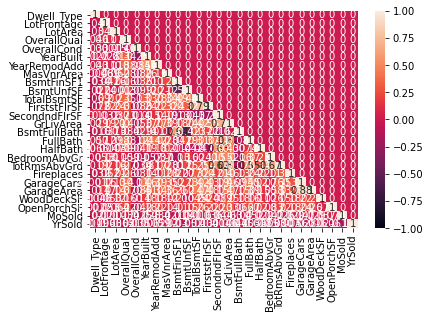

In [6]:

# heatmap for correlation
sns.heatmap(cor,xticklabels=numCols,yticklabels=numCols,vmin=-1,vmax=1,annot=True)


In [7]:

# copy for original dataset
housePrices_d = house.copy()

# create for dummy columns for factor columns
for c in colsObject:
    dummy = pd.get_dummies(housePrices_d[c],drop_first=True, prefix=c)
    housePrices_d = housePrices_d.join(dummy)

# original columns are drop in dataset
housePrices_d = housePrices_d.drop(colsObject, axis=1)

# split the data train and test 
train,test = train_test_split(housePrices_d, test_size=0.3)



In [8]:

# train split in trainx and trainy
# first drop the y column
trainx = train.drop('Property_Sale_Price',axis=1)

# add y column in trainy
trainy = train['Property_Sale_Price']

# test split in testx and testy
# first drop the y column
testx = train.drop('Property_Sale_Price', axis=1)

# add y column in testy
testy = train['Property_Sale_Price']

# add a constant term to the trainx and testx
trainx = sm.add_constant(trainx)
testx = sm.add_constant(testx)

# 1 OLS MODEL build
mo = sm.OLS(trainy,trainx).fit()


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


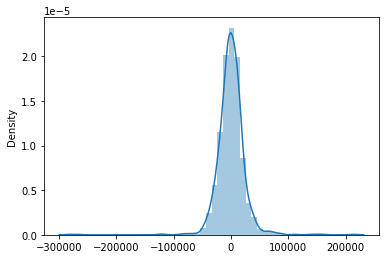

In [9]:

# summary of OLS model
# mo.summary()
 
# Predict value trainx value
pre = mo.predict(trainx)
err1 = trainy - pre
np.mean(err1)

# check the normal distrubution 
sns.distplot(err1)

# predict value testx value 
pre = mo.predict(testx)

# create Dataframe for testx 
results = pd.DataFrame({'Property_Sale_Price':testy,
                       'Predict_Property_Sale_Price':np.round(pre,2)})

# error find for prediction value and actual value 
results['err'] = results['Property_Sale_Price'] - results['Predict_Property_Sale_Price']



In [10]:

# square error
results['sqerr'] = results['err']**2

# find Sum Of Square Error
sse = np.sum(results.sqerr)

# find Mean Of Squared Error
mse = sse/len(testy)


In [11]:

# Model 2

# transform y to boxcox y
bcy = spstats.boxcox(housePrices_d.Property_Sale_Price)

# lambda value 
lamda = bcy[1]

# transform array include in dataframe 
housePrices_d['Property_Sale_Price_BCT'] = bcy[0]

# split the data in train2 and test2
train2, test2 = train_test_split(housePrices_d, test_size=0.3)

# drop the old y variable 
train2 = train2.drop('Property_Sale_Price', axis=1)
test2 = test2.drop('Property_Sale_Price', axis=1)

# train2 data split in 2 variables train2x and train2y
train2x = train2.drop('Property_Sale_Price_BCT', axis=1)
train2y = train2['Property_Sale_Price_BCT']

# test2 data split in 2 variables test2x and test2y
test2x = test2.drop('Property_Sale_Price_BCT', axis=1)
test2y = test2['Property_Sale_Price_BCT']

# add to constant value train2x and test2x
train2x = sm.add_constant(train2x)
test2x = sm.add_constant(test2x)



In [12]:

# 2 OLS MODEL build
mo2 = sm.OLS(train2y,train2x).fit()

# predict train2x value
pre1 = mo2.predict(train2x)
err1 = train2y - pre1
np.mean(err1)

# predict test2x value
pre1 = mo2.predict(test2x)

# convert the predicted values to the actual format
acty2 = np.exp(np.log(test2y*lamda+1)/lamda)
predy2 = np.round(np.exp(np.log(pre1*lamda+1)/lamda),2)


results = pd.DataFrame({'Actual':acty2,'Predicted':predy2})
results['err'] = results['Actual'] - results['Predicted'] 
results['sqerr'] = results['err']**2



In [13]:

# first method for mse find
sse1 = np.sum(results.sqerr)
mse1 = sse1/len(test2y)



In [14]:

# Second method for mse find
mse2 = MSE(results.Actual, results.Predicted)


In [15]:

print(f"sse is {sse} and sse1 is {sse1}")
print(f"mse is {mse} and mse1 without function is {mse1} and mse2 with function {mse2} ")

sse is 850211845835.9803 and sse1 is 661946099816.0991
mse is 585948894.4424399 and mse1 without function is 1064222025.4278121 and mse2 with function 1064222025.4278121 
